In [44]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv"

# Read the Mouse and print
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [45]:
#Read the clinical trial data and print it 
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [46]:
# Combine the data into a single dataset
trial_df = pd.merge(mouse_data, clinical_data, how="outer", on="Mouse ID")


# Display the data table for preview
trial_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [47]:
# Select specific columns for analysis 
tumor_response_df = trial_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_df = pd.DataFrame(tumor_response_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean())

# Preview DataFrame
tumor_response_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [48]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response_df["Tumor Volume SEM"] = tumor_response_df["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
tumor_response_df.reset_index(inplace = True)
# Preview DataFrame
tumor_response_df.head()


,Drug,Timepoint,Tumor Volume (mm3),Tumor Volume SEM
0,Capomulin,0,45.000000,0.898067
1,Capomulin,5,44.266086,0.898067
2,Capomulin,10,43.084291,0.898067
3,Capomulin,15,42.064317,0.898067
4,Capomulin,20,40.716325,0.898067


In [49]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_pivot = tumor_response_df.pivot_table(index="Timepoint", columns="Drug",values="Tumor Volume (mm3)")

# Preview that Reformatting worked
tumor_response_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [50]:
drug = tumor_response_pivot.columns
drug

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

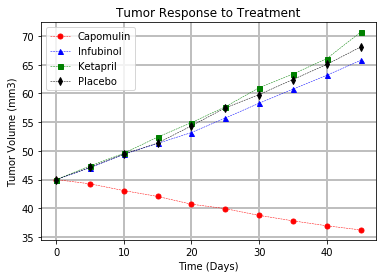

In [64]:
# Generate the Plot (with Error Bars)

#Capomulin plot
plt.errorbar(tumor_response_pivot.index, tumor_response_pivot["Capomulin"], 
             color="r", marker="o", markersize=5, linestyle="--", linewidth=0.5)

#Infubinol plot
plt.errorbar(tumor_response_pivot.index, tumor_response_pivot["Infubinol"],
            color="b", marker="^", markersize=5, linestyle="--", linewidth=0.5)

#Ketapril plot
plt.errorbar(tumor_response_pivot.index, tumor_response_pivot["Ketapril"],
            color="g", marker="s", markersize=5, linestyle="--", linewidth=0.5)

#Placebo plot
plt.errorbar(tumor_response_pivot.index, tumor_response_pivot["Placebo"],
            color="k", marker="d", markersize=5, linestyle="--", linewidth=0.5)

#plot contents
x_lim = len(tumor_response_pivot.index)
plt.grid(True, lw = 2, ls = "-", c = ".75")

#Chart title 
plt.title("Tumor Response to Treatment")

#x label 
plt.xlabel("Time (Days)")

#y label 
plt.ylabel("Tumor Volume (mm3)")

#legend
plt.legend(loc="upper left")

# Save the Figure
plt.savefig("./data/tumor_errorbar_plot")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [52]:
#Select required columns for analysis
metastatic_response_df = trial_df[["Drug", "Timepoint", "Metastatic Sites"]]

# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response_df = pd.DataFrame(metastatic_response_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean())

# Preview DataFrame
metastatic_response_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [53]:
trial_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [54]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_response_df["Metastatic Site SEM"] = metastatic_response_df["Metastatic Sites"].sem()

# Convert to DataFrame
metastatic_response_df.reset_index(inplace=True)

# Preview DataFrame
metastatic_response_df.head()


,Drug,Timepoint,Metastatic Sites,Metastatic Site SEM
0,Capomulin,0,0.000000,0.090044
1,Capomulin,5,0.160000,0.090044
2,Capomulin,10,0.320000,0.090044
3,Capomulin,15,0.375000,0.090044
4,Capomulin,20,0.652174,0.090044


In [55]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_response_pivot = metastatic_response_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  

# Preview that Reformatting worked
metastatic_response_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


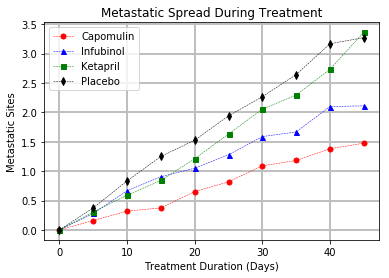

In [56]:
# Generate the Plot (with Error Bars)

#Capomulin plot
plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

#Infubinol plot
plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Infubinol'],
             color='b', marker='^', markersize=5, linestyle='--', linewidth=0.5)

#Ketapril plot
plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Ketapril'],
             color='g', marker='s', markersize=5, linestyle='--', linewidth=0.5)

#Placebo plot
plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Placebo'], 
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5)


#plot contents
x_lim = len(metastatic_response_pivot.index)
plt.grid(True, lw = 2, ls = "-", c = ".75")

# Chart title
plt.title("Metastatic Spread During Treatment")

# x label
plt.xlabel("Treatment Duration (Days)")

# y label
plt.ylabel("Metastatic Sites")

# legend 
plt.legend(loc='upper left')

# Save the Figure
plt.savefig("./data/metastatic_errorbar_plot")

# Show the Figure
plt.show()


## Survival Rates

In [57]:
#Select required columns for analysis
survival_rate_df = trial_df[['Drug', 'Timepoint', 'Mouse ID']]
survival_rate_df = survival_rate_df.set_index(['Drug', 'Timepoint'])

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate_df['Mouse Count'] = survival_rate_df.groupby(['Drug','Timepoint']).count()['Mouse ID']

# Preview DataFrame
survival_rate_df.head()

Mouse ID  Mouse Count
Drug     Timepoint                      
Stelasyn 0             f234           26
         5             f234           25
         10            f234           23
         15            f234           23
         20            f234           21

In [58]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate_pivot = survival_rate_df.pivot_table(index='Timepoint',columns='Drug',values='Mouse Count')  

# Preview the Data Frame
survival_rate_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


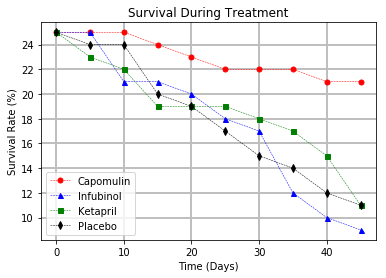

In [59]:
# Generate the Plot (Accounting for percentages)
# Capomulin plot
plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Capomulin'], 
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

#Infubinol plot
plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Infubinol'], 
             color='b', marker='^', markersize=5, linestyle='--', linewidth=0.5)

#Ketapril plot
plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Ketapril'], 
             color='g', marker='s', markersize=5, linestyle='--', linewidth=0.5)

#Placebo plot
plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Placebo'], 
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5)

#plot contents
x_lim = len(metastatic_response_pivot.index)
plt.grid(True, lw = 2, ls = "-", c = ".75")

# Chart title
plt.title("Survival During Treatment")

# x label
plt.xlabel("Time (Days)")

# y label
plt.ylabel("Survival Rate (%)")

# legend 
plt.legend(loc='bottom left')

# Save the Figure
plt.savefig("./data/survival_rates_plot")

# Show the Figure
plt.show()

## Summary Bar Graph

In [60]:
# Calculate the percent changes for each drug
tumor_volume_change_percentage =  ((tumor_response_pivot.iloc[-1]-tumor_response_pivot.iloc[0])/tumor_response_pivot.iloc[0]) * 100

# Display the data to confirm
tumor_volume_change_percentage

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [61]:
# Store all Relevant Percent Changes into a Tuple
tumor_percent_change = list(tumor_volume_change_percentage.values)
tumor_percent_change

[-19.475302667894173,
 42.51649185589744,
 46.12347172785187,
 57.028794686606076,
 53.92334713476923,
 51.29796048315153,
 47.24117486320637,
 -22.320900462766673,
 52.085134287899024,
 46.57975086509525]

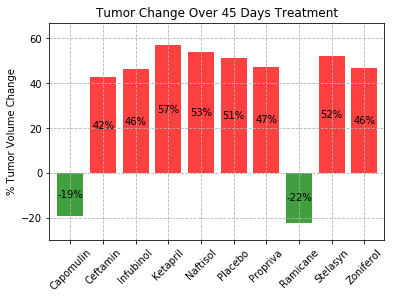

In [66]:
#plot the summary bar graph for all drugs
ax = plt.subplot()
x_axis = np.arange(0, len(drug))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)

plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")

plt.xlim(-0.25, len(drug))
plt.ylim(-30, max(tumor_volume_change_percentage) + 10)
plt.grid(True, linestyle='dashed')

plt.xticks(tick_locations, drug)

width = 0.4
vals = [1,2,3,4,5]
colors = ['r','b','b','b','b']
colors = []
for value in tumor_volume_change_percentage:
    if value >= 0 :
        colors.append('r')
    else:
        colors.append('g')
percents=ax.bar(x_axis, tumor_volume_change_percentage, color=colors, alpha=0.75, align="edge")
def autolabel(percents, ax):

    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    for percent in percents:
        height = percent.get_height()
       
        ax.text(percent.get_x()+ percent.get_width()/2., 0.5*height, '%d' % int(height) +"%", ha='center', va='center')

autolabel(percents, ax)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)


plt.savefig("TumorChange_Over_45_Days_Treatment.png")

# Save the Figure
plt.savefig("./data/summary_bar_graph")

plt.show()